In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import math
import gzip
import random
import string
import time
import dateutil
from tqdm.notebook import tqdm

In [2]:
import gzip
import numpy as np
import pandas as pd
import scipy as sp
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from file

In [4]:
# parsing json data as list of json objects from file
def parseData(file_name_path):
    for line in open(file_name_path):
        yield eval(line)

# parsing json data as list of json objects from URL
def parseDataFromURL(file_name_path):
    for line in urlopen(file_name_path):
        yield eval(line)

In [5]:
# reading csv file to dataframe
df = pd.read_csv("Salary_Data.csv")

# reading json file to dataframe
_ = pd.read_json("data_file.json", lines=True)

###### Visualization

Text(0, 0.5, 'ylabel')

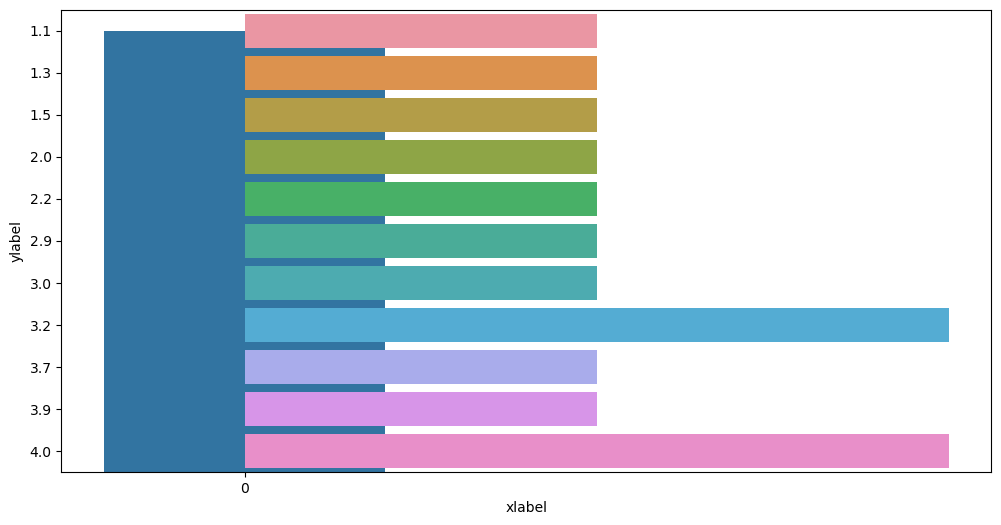

In [6]:
#countplot using sns
plt.figure(figsize=(12,6))

sns.countplot(df['YearsExperience'])
sns.countplot(y='YearsExperience', data=df) #alternate

plt.xlabel('xlabel')
plt.ylabel('ylabel')

<AxesSubplot: xlabel='YearsExperience', ylabel='count'>

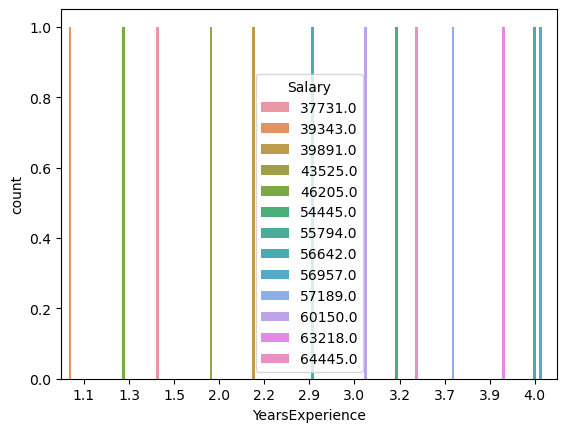

In [7]:
#countplot with additional data
sns.countplot(x ='YearsExperience', hue='Salary', data=df)

In [8]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='total_bill', ylabel='count'>

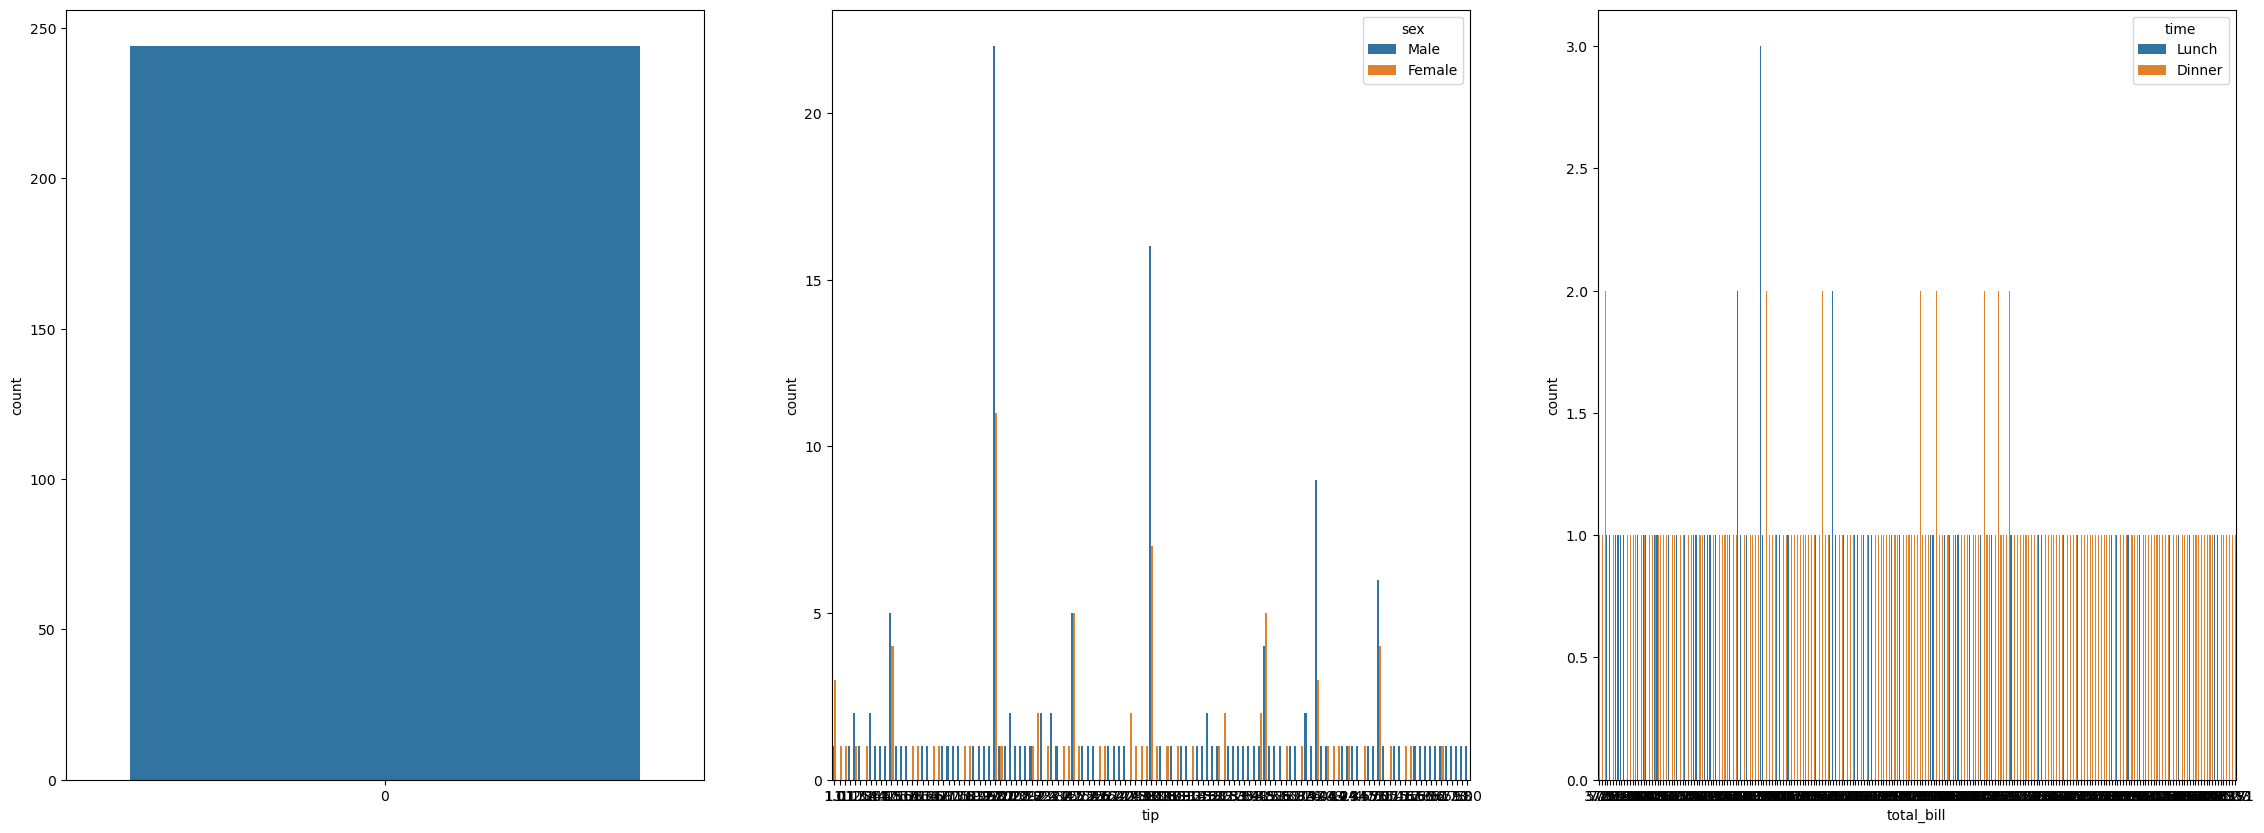

In [9]:
#draw multiple subplots
fig, ax = plt.subplots(1, 3, figsize=(28,10))
sns.countplot(df['total_bill'], ax=ax[0])
sns.countplot(x ='tip', hue='sex', data=df, ax=ax[1])
sns.countplot(x ='total_bill', hue='time', data=df, ax=ax[2])

Text(0.5, 1.0, 'gs[-1, -2]')

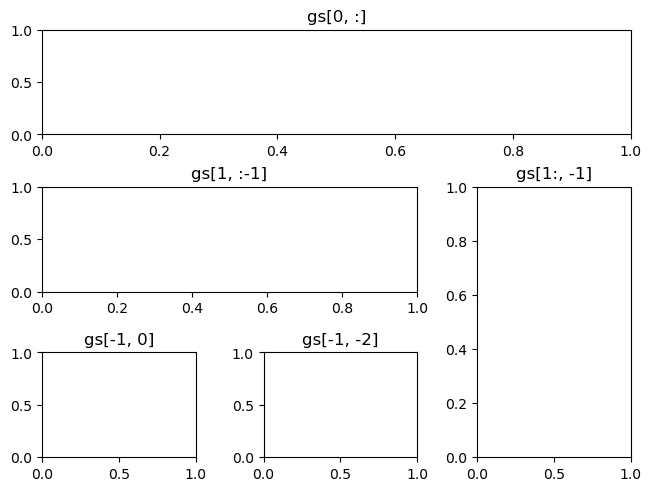

In [10]:
#using grid spec for subplots -- It allows to create grid that spans rows and columns
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

array([<AxesSubplot: title={'center': 'total_bill'}>,
       <AxesSubplot: title={'center': 'tip'}>], dtype=object)

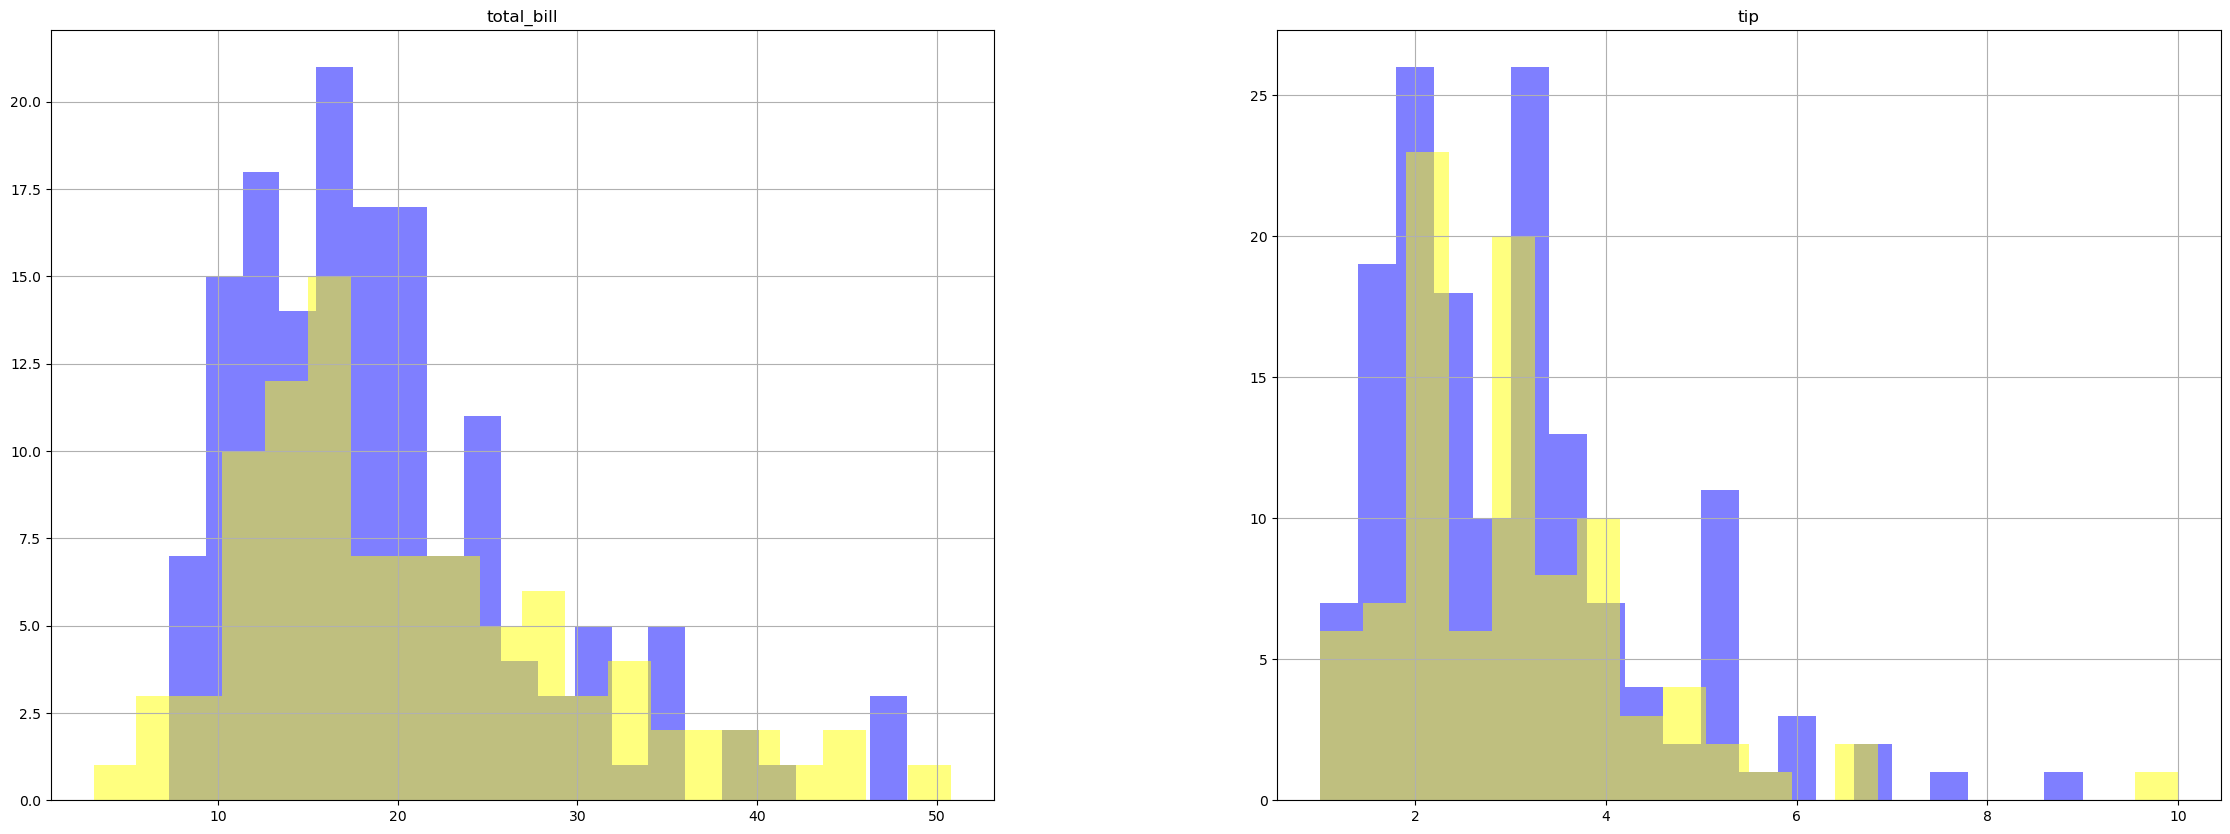

In [11]:
#directly use pandas to visualize numeric data put into bins
numeric_features = ['total_bill', 'tip']
fig, ax = plt.subplots(1, 2, figsize=(28,10))
df[df['smoker']=='No'][numeric_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df['smoker']=='Yes'][numeric_features].hist(bins=20, color='yellow', alpha=0.5, ax=ax)

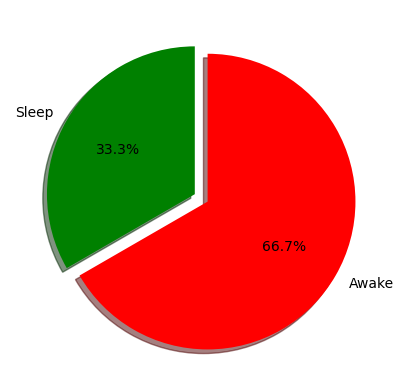

In [12]:
#pie plot
sizes = [15, 30]
pieplot=plt.pie(sizes,labels=["Sleep","Awake"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = ["Green", "Red"],
                 startangle = 90,
                 explode=(0, 0.1))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mkilaru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


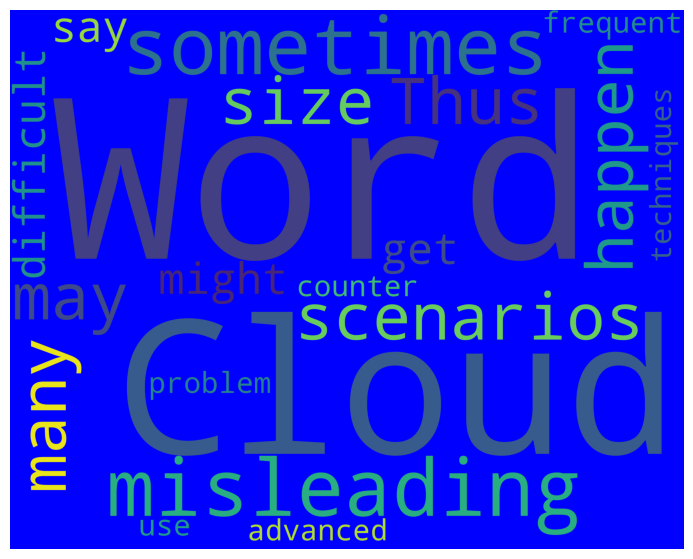

In [13]:
#word cloud
import nltk
nltk.download('stopwords')
#word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop=stopwords.words('english')

word_string = "Word Cloud can be misleading sometimes. In few scenarios, it may happen that many words in our Word Cloud will have the same size, Thus, it might get difficult to say which of them is more frequent than the other. We can use more advanced techniques to counter the problem."
wordCloud = WordCloud(stopwords=stop, 
                         background_color="blue", 
                         width = 2500, 
                         height = 2000).generate(word_string)
plt.figure(1, figsize=(10,7))
plt.imshow(wordCloud) #show image
plt.axis('off')
plt.show()

###### Sorting

In [14]:
#sort list of tuples
tuplesList = [(2,3), (4,5), (1, 8), (9,2), (3,1)]
sorted(tuplesList, key=lambda entry:(entry[1], entry[0]), reverse=True)

[(1, 8), (4, 5), (2, 3), (9, 2), (3, 1)]